In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/portland-weather/PortlandWeather2013b.txt


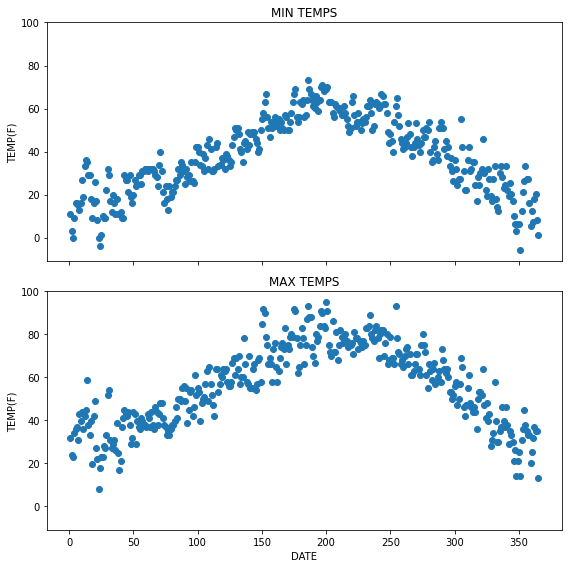

In [2]:
import matplotlib.pyplot as plt
import numpy as np

file_name = '../input/portland-weather/PortlandWeather2013b.txt'
def open_file(filename):
    new_dict = {}
    key_list = []
    with open(filename) as file:
        text = file.readlines()
    for key in text[0].split()[1:]:
        new_dict.update({key: []})
        key_list.append(key)
    for line in text[2:]:
        counter = 0
        for val in line.split()[1:]:
            if counter == 0:
                new_dict[key_list[counter]].append(val)
            elif counter == 4 or counter == 5:
                new_numb = c_to_f(int(val)/10)
                new_dict[key_list[counter]].append(new_numb)
            else:
                new_dict[key_list[counter]].append(int(val)/10)
            counter += 1
        
    return new_dict
    
def c_to_f(data):
    conv = (data*9/5)+32
    return conv    

def graph_scatter(x1, y1, title1, x_label1, y_label1, x2, y2, title2, x_label2, y_label2):
    fig = plt.figure(figsize = (8, 8))
    ax1, ax2 = fig.subplots(nrows=2, ncols=1, sharex = True, sharey=True)
    ax1.scatter(x1, y1)
    ax2.scatter(x1, y2)
    ax1.set_title(title1)
    ax2.set_xlabel(x_label1)
    ax1.set_ylabel(y_label1)
    ax2.set_ylabel(y_label2)
    ax2.set_title(title2)
    fig.tight_layout()
#     plt.style.use('seaborn')
#     plt.subplot(211)
#     plt.title(title1)
#     plt.ylabel(y_label1)
#     plt.xlabel(x_label1)
#     plt.scatter(x1, y1)
#     plt.tight_layout()
#     plt.subplot(212)
#     plt.title(title2)
#     plt.ylabel(y_label2)
#     plt.xlabel(x_label2)
#     plt.scatter(x2, y2)
#     plt.tight_layout()
    
    plt.show()

weather_dict = open_file(file_name)
x_ticks = np.arange(1, 366)


graph_scatter(x_ticks, weather_dict['TMIN'], 'MIN TEMPS', 'DATE', 'TEMP(F)', x_ticks, weather_dict['TMAX'], 'MAX TEMPS', 'DATE', 'TEMP(F)')